<a href="https://colab.research.google.com/github/anilkumarraut/StartUps_-Sucess-Failure-_prediction/blob/main/Sucess_rate_of_startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! unzip /content/drive/MyDrive/Colab_data/archive.zip

Archive:  /content/drive/MyDrive/Colab_data/archive.zip
  inflating: big_startup_secsees_dataset.csv  


In [2]:
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

df = pd.read_csv("/content/big_startup_secsees_dataset.csv")
df.head(10)       # Sucess rate prediction

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18


# Handling Missing Data


*  Imputation: Replace missing values with a specific value (e.g., mean, median, mode, or a custom value).

*  Dropping: Remove rows or columns with a high percentage of missing values if they don't provide meaningful information.



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [4]:
missing_values = df.isnull()
missing_counts = missing_values.sum()
missing_counts


permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64

In [5]:
percentage_null = (df.isnull().sum() / len(df)) * 100
percentage_null

permalink             0.000000
name                  0.001507
homepage_url          7.621143
category_list         4.743250
funding_total_usd     0.000000
status                0.000000
country_code         10.483968
state_code           12.878194
region               12.099204
city                 12.096191
funding_rounds        0.000000
founded_at           22.934245
first_funding_at      0.036162
last_funding_at       0.000000
dtype: float64

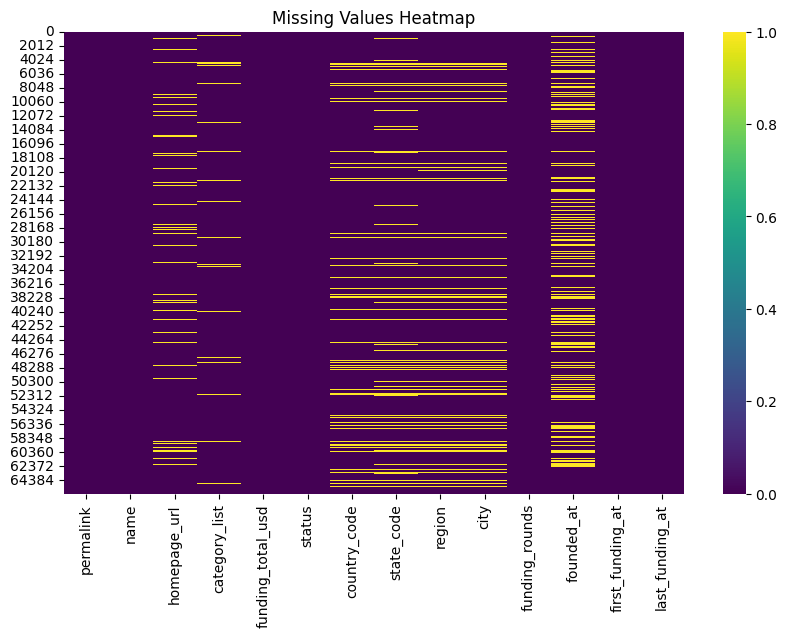

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=True)
plt.title('Missing Values Heatmap')
plt.show()

From the heatmap, it was observed that the column with the most missing data is founded_at, accounting for approximately 23% of missing values. To address this, we can impute missing values in the founded_at column by making the assumption that the company was founded approximately two years before it raised its initial funding. Here's the adjusted code:

In [7]:
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')

# Convert 'first_funding_at' to datetime
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')

# Calculate the date two years before the 'first_funding_at' date for each row
df['imputed_founded_at'] = df['first_funding_at'] - pd.DateOffset(years=2)

# Fill missing 'founded_at' values with the calculated imputed values
df['founded_at'].fillna(df['imputed_founded_at'], inplace=True)

# Drop the 'imputed_founded_at' column if no longer needed
df.drop(columns=['imputed_founded_at'], inplace=True)

In [11]:
founded_at_array = np.array(df["founded_at"])
founded_at_array

array(['2013-01-05T00:00:00.000000000', '2014-09-04T00:00:00.000000000',
       '2012-01-30T00:00:00.000000000', ...,
       '2011-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000'], dtype='datetime64[ns]')


Certainly! Data preprocessing is a critical stage in any machine learning project. It involves cleaning and transforming the raw data to make it suitable for training a machine learning model. Here are the key steps you should follow in the data preprocessing stage:

Handling Missing Data:

Identify missing values in your dataset using the isnull() method.
Decide on a strategy for handling missing data:
Imputation: Replace missing values with a specific value (e.g., mean, median, mode, or a custom value).
Dropping: Remove rows or columns with a high percentage of missing values if they don't provide meaningful information.
Example for imputation:

python
Copy code
df['column_name'].fillna(df['column_name'].mean(), inplace=True)
Handling Duplicates:

Detect and remove duplicate rows if they exist in your dataset using the drop_duplicates() method.
Example:

python
Copy code
df.drop_duplicates(inplace=True)
Data Type Conversion:

Ensure that columns have the correct data types. For example, categorical variables should be of type object or category, and numerical variables should be of type int or float.
Use the astype() method for data type conversions.
Example:

python
Copy code
df['categorical_column'] = df['categorical_column'].astype('category')
Handling Categorical Data:

Convert categorical variables into numerical form to be usable by machine learning algorithms. You can use techniques like one-hot encoding or label encoding.
Example for one-hot encoding:

python
Copy code
df = pd.get_dummies(df, columns=['categorical_column'], drop_first=True)
Scaling and Normalization:

Scale or normalize numerical features to bring them to a similar scale, especially if you're using algorithms sensitive to feature scales (e.g., gradient-based algorithms).
Use methods like StandardScaler from scikit-learn.
Example:

python
Copy code
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['numerical_column'] = scaler.fit_transform(df[['numerical_column']])
Feature Engineering:

Create new features if they can provide valuable information to the model.
Transform existing features to make them more suitable for modeling (e.g., log transformation, polynomial features).
Example for creating a new feature:

python
Copy code
df['new_feature'] = df['feature1'] * df['feature2']
Outlier Detection and Handling (optional):

Identify and handle outliers if they exist in your data. You can use statistical methods or visualization techniques to detect outliers.
Decide whether to remove, transform, or keep outliers based on domain knowledge and the impact on your model.
Data Splitting:

After preprocessing, split your data into training and testing sets using train_test_split() from scikit-learn.
Example:

python
Copy code
from sklearn.model_selection import train_test_split

X = df.drop('target_column', axis=1)
y = df['target_column']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Data Save (Optional):

If you have a large dataset and want to avoid preprocessing steps in the future, you can save the preprocessed data to a new file using Pandas' to_csv() or other appropriate methods.
Example:

python
Copy code
df.to_csv('preprocessed_data.csv', index=False)
These are the fundamental steps in data preprocessing. Depending on your specific dataset and project requirements, you may need to perform additional steps or address domain-specific challenges during this stage. Always remember to maintain a clear understanding of your data and the impact of each preprocessing step on your machine learning model.

# Simplifying the category_list column

In [ ]:
main_category = []

for i in df['category_list']:
    if not isinstance(i,str):
      main_category.append('Other')
    else:
      main_category.append(i.split('|')[0])

df['main_category'] = main_category
df.head(20)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,main_category
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,2013-01-05,2015-01-05,2015-01-05,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Application Platforms
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,2012-01-30,2014-01-30,2014-01-30,Apps
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Curated Web
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Software
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,2012-07-01,2014-07-01,2014-07-01,Games
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21,Biotechnology
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,Analytics
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05,Mobile
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18,E-Commerce


# One Hot Encoding and classify by startups class

In [13]:
status = []

for i in df['status']:
    if i in ['acquired','ipo']:
        status.append('success')
    elif i == 'closed':
        status.append('fail')
    else:
        status.append('operating')

df['status_class'] = status
status_class = pd.get_dummies(df['status_class'])
df = pd.concat([df,status_class],axis=1)
df.head(20)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,...,founded_at,first_funding_at,last_funding_at,status_class,fail,operating,success,fail,operating,success
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,...,2013-01-05,2015-01-05,2015-01-05,operating,0,1,0,0,1,0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,...,2014-09-04,2014-03-01,2014-10-14,operating,0,1,0,0,1,0
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,...,2012-01-30,2014-01-30,2014-01-30,operating,0,1,0,0,1,0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,...,2007-01-01,2008-03-19,2008-03-19,operating,0,1,0,0,1,0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,...,2010-01-01,2014-07-24,2014-07-24,operating,0,1,0,0,1,0
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,...,2012-07-01,2014-07-01,2014-07-01,operating,0,1,0,0,1,0
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,...,1997-01-01,2009-09-11,2009-12-21,operating,0,1,0,0,1,0
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,...,2011-01-01,2013-01-03,2015-11-09,operating,0,1,0,0,1,0
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050,operating,USA,CA,SF Bay Area,San Francisco,...,2011-08-01,2011-07-20,2014-02-05,operating,0,1,0,0,1,0
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000,operating,CHL,12,Santiago,Las Condes,...,2012-01-01,2013-02-18,2013-02-18,operating,0,1,0,0,1,0
